In [1]:
from bs4 import  BeautifulSoup as bs
import pandas as pd
import  requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

<h3>Revenue(web crawler to csv)

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
urls = requests.get(url)

In [9]:
soup = bs(urls.text,'lxml')
table = soup.findAll('table')[1]
world_table = table.findAll('th')

In [10]:
print(world_table)

[<th>Rank
</th>, <th>Name
</th>, <th>Industry
</th>, <th>Revenue <br/>(USD millions)
</th>, <th>Revenue growth
</th>, <th>Employees
</th>, <th>Headquarters
</th>]


In [11]:
table_titles = [title.text.strip() for title in world_table]
print(table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [12]:
tt = pd.DataFrame(columns=table_titles)
print(tt)

Empty DataFrame
Columns: [Rank, Name, Industry, Revenue (USD millions), Revenue growth, Employees, Headquarters]
Index: []


In [13]:
column_data = table.find_all('tr')
for rows in column_data[1:]:
    row_data = rows.find_all('td')
    row_data_strip = [data.text.strip() for data in row_data]
    length = len(tt)
    tt.loc[length] = row_data_strip

In [16]:
pd.set_option('display.max.rows',100)
#print(tt)

In [16]:
print(tt.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB
None


In [82]:
tt.to_csv(r'C:\Users\Public\new\us.csv',index = False)

In [83]:
us = pd.read_csv(r'C:\Users\Public\new\us.csv')

In [84]:
us

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,General merchandisers,"572,754",2.4%,"2,300,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"469,822",21.7%,"1,608,000","Seattle, Washington"
2,3,Apple,Electronics industry,"365,817",33.2%,"154,000","Cupertino, California"
3,4,CVS Health,Healthcare,"292,111",32.0%,"258,000","Woonsocket, Rhode Island"
4,5,UnitedHealth Group,Healthcare,"287,597",11.8%,"350,000","Minnetonka, Minnesota"
5,6,Exxon Mobil,Petroleum industry,"285,640",57.4%,"63,000","Spring, Texas"
6,7,Berkshire Hathaway,Conglomerate,"276,094",12.5%,"372,000","Omaha, Nebraska"
7,8,Alphabet,Technology,"257,637",41.2%,"156,000","Mountain View, California"
8,9,McKesson Corporation,Health,"238,228",3.1%,"67,500","Irving, Texas"
9,10,AmerisourceBergen,Pharmaceutical industry,"213,989",12.7%,"40,000","Chesterbrook, Pennsylvania"


In [29]:
specific_name = ['Apple','Cisco']
us[us['Name'].isin(specific_name)]

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
2,3,Apple,Electronics industry,"365,817",33.2%,"154,000","Cupertino, California"
74,75,Cisco,Telecom Hardware Manufacturing,"49,818",1.0%,"79,500","San Jose, California"


In [35]:
us[us['Industry'].str.contains('Healthcare')]

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
3,4,CVS Health,Healthcare,"292,111",32.0%,"258,000","Woonsocket, Rhode Island"
4,5,UnitedHealth Group,Healthcare,"287,597",11.8%,"350,000","Minnetonka, Minnesota"
14,15,Cardinal Health,Healthcare,"162,467",6.2%,"46,827","Dublin, Ohio"
19,20,Elevance Health,Healthcare,"138,639",13.8%,"98,200","Indianapolis, Indiana"
25,26,Centene,Healthcare,"125,982",13.4%,"72,500","St. Louis, Missouri"
61,62,HCA Healthcare,Healthcare,"58,752",14.0%,"244,000","Nashville, Tennessee"


In [85]:
us_id = us.set_index('Industry')
us_id.sort_values(by=['Industry','Rank'])

,Rank,Name,Revenue (USD millions),Revenue growth,Employees,Headquarters
Industry,,,,,,
Aerospace and Defense,55,Lockheed Martin,"67,044",2.5%,"114,000","Bethesda, Maryland"
Aerospace and defense,60,Boeing,"62,286",7.1%,"142,000","Chicago, Illinois"
Agriculture cooperative,97,CHS,"38,448",1.4%,"9,941","Inver Grove Heights, Minnesota"
Agriculture manufacturing,86,John Deere,"44,024",23.9%,"75,550","Moline, Illinois"
Airspace and defense,96,General Dynamics,"38,469",8.7%,"103,100","Reston, Virginia"
Apparel,85,Nike,"44,538",19.1%,"73,300","Beaverton, Oregon"
Automotive,25,General Motors,"127,004",3.7%,"157,000","Detroit, Michigan"
Automotive and Energy,65,Tesla,"53,823",70.7%,"99,290","Austin, Texas"
Automotive industry,22,Ford Motor Company,"136,341",7.2%,"183,000","Dearborn, Michigan"


In [71]:
us.iloc[0:10]

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Headquarters
Employees,,,,,,
"2,300,000",1,Walmart,General merchandisers,"572,754",2.4%,"Bentonville, Arkansas"
"1,608,000",2,Amazon,Retail and Cloud Computing,"469,822",21.7%,"Seattle, Washington"
"154,000",3,Apple,Electronics industry,"365,817",33.2%,"Cupertino, California"
"258,000",4,CVS Health,Healthcare,"292,111",32.0%,"Woonsocket, Rhode Island"
"350,000",5,UnitedHealth Group,Healthcare,"287,597",11.8%,"Minnetonka, Minnesota"
"63,000",6,Exxon Mobil,Petroleum industry,"285,640",57.4%,"Spring, Texas"
"372,000",7,Berkshire Hathaway,Conglomerate,"276,094",12.5%,"Omaha, Nebraska"
"156,000",8,Alphabet,Technology,"257,637",41.2%,"Mountain View, California"
"67,500",9,McKesson Corporation,Health,"238,228",3.1%,"Irving, Texas"


In [134]:
us['Employees'] = us['Employees'].apply(lambda x:int(x))
us.sort_values('Employees')
us_employee = us
us_employee

,index,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
88,88,89,StoneX Group,Financials,"42,534",21.4%,3242,"New York City, New York"
89,89,90,Plains All American Pipeline,Petroleum industry,"42,078",80.7%,4100,"Houston, Texas"
90,90,91,Enterprise Products,Petroleum industry,"40,807",50.0%,6911,"Houston, Texas"
55,55,56,Freddie Mac,Financials,"65,898",0.5%,7301,"McLean, Virginia"
32,32,33,Fannie Mae,Financials,"101,543",4.6%,7400,"Washington, D.C."
98,98,99,Northwestern Mutual,Insurance,"36,751",8.8%,7585,"Milwaukee, Wisconsin"
29,29,30,Valero Energy,Petroleum industry,"108,332",80.2%,9804,"San Antonio, Texas"
77,77,78,ConocoPhillips,Petroleum industry,"48,349",151.1%,9900,"Houston, Texas"
96,96,97,CHS,Agriculture cooperative,"38,448",1.4%,9941,"Inver Grove Heights, Minnesota"
53,53,54,Energy Transfer Partners,Petroleum industry,"67,418",73.1%,12558,"Dallas, Texas"


In [136]:
us_employee.to_json(r'C:\Users\Public\new\us_employee.json')

<h2>Automate API Extraction&Analysis

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from time import time
from time import sleep

In [13]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.Timestamp('now')
    df = df.append(df2)


    if not os.path.isfile(r'C:\Users\Public\new\API.csv'):
        df.to_csv(r'C:\Users\Public\new\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Public\new\API.csv', mode='a', header=False)
        
    df = pd.read_csv(r'C:\Users\Public\new\API.csv')


In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
for i in range(10):
    api_runner()
    sleep(60) 
exit()

{'status': {'timestamp': '2023-07-16T16:01:00.820Z', 'error_code': 0, 'error_message': None, 'elapsed': 26, 'credit_count': 1, 'notice': None, 'total_count': 10157}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10342, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

NameError: name 'df' is not defined

In [163]:
df_nor = pd.read_csv(r'C:\Users\Public\new\API.csv',on_bad_lines='skip')
df_nor

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10342,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.943090e+07,1.943090e+07,False,NaN,1,NaN,NaN,NaN,2023-07-16T14:58:00.000Z,30402.218820,8.005285e+09,-51.1999,0.267759,0.341152,0.159975,19.047416,13.506402,3.303332,5.907425e+11,48.4085,6.384466e+11,NaN,2023-07-16T14:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 23:19:14.184555,NaN
1,1,1027,Ethereum,ETH,ethereum,7124,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202002e+08,1.202002e+08,True,NaN,2,NaN,NaN,NaN,2023-07-16T14:58:00.000Z,1940.824652,4.146866e+09,-49.3850,0.484015,0.385480,3.849432,16.384371,7.933384,-6.558230,2.332875e+11,19.1161,2.332875e+11,NaN,2023-07-16T14:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 23:19:14.184555,NaN
2,2,825,Tether,USDT,tether,56974,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.363837e+10,8.671579e+10,True,NaN,3,NaN,NaN,NaN,2023-07-16T14:58:00.000Z,1.000193,1.669901e+10,-47.8186,-0.025447,-0.014664,-0.004483,0.137438,-0.003350,-0.000201,8.365454e+10,6.8527,8.673255e+10,NaN,2023-07-16T14:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-16 23:19:14.184555,NaN
3,3,52,XRP,XRP,xrp,993,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.254409e+10,9.998862e+10,False,NaN,4,NaN,NaN,NaN,2023-07-16T14:58:00.000Z,0.768121,3.270138e+09,-36.8640,2.885215,6.369216,63.500836,66.001448,74.434236,49.957734,4.036024e+10,3.3072,7.681213e+10,NaN,2023-07-16T14:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 23:19:14.184555,NaN
4,4,1839,BNB,BNB,bnb,1506,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558487e+08,1.558487e+08,False,NaN,5,NaN,NaN,NaN,2023-07-16T14:58:00.000Z,249.278202,3.959176e+08,-34.2953,0.295383,-0.461440,6.151773,5.613175,-19.201155,-26.651347,3.884969e+10,3.1834,3.884969e+10,NaN,2023-07-16T14:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 23:19:14.184555,NaN
5,5,3408,USD Coin,USDC,usd-coin,13332,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.728106e+10,2.728106e+10,False,NaN,6,NaN,NaN,NaN,2023-07-16T14:58:00.000Z,0.999870,2.018680e+09,-45.9129,-0.019334,-0.015127,-0.025933,-0.032213,-0.022789,0.028311,2.727751e+10,2.2352,2.727751e+10,NaN,2023-07-16T14:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-16 23:19:14.184555,NaN
6,6,5426,Solana,SOL,solana,486,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.026838e+08,5.526208e+08,True,NaN,7,NaN,NaN,NaN,2023-07-16T14:58:00.000Z,28.373192,9.044714e+08,-43.9379,0.291386,1.539181,31.674425,94.918747,37.833777,13.828522,1.142542e+10,0.9362,1.567962e+10,NaN,2023-07-16T14:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 23:19:14.184555,NaN
7,7,2010,Cardano,ADA,cardano,871,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.497646e+10,3.598361e+10,False,NaN,8,NaN,NaN,NaN,2023-07-16T14:58:00.000Z,0.323005,2.652339e+08,-43.2710,0.760518,-2.234442,12.072257,25.788039,-12.132490,-26.024520,1.129757e+10,0.9257,1.453522e+10,NaN,2023-07-16T14:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 23:19:14.184555,NaN
8,8,74,Dogecoin,DOGE,dogecoin,743,2013-12-15T00:00:00.000Z,

In [164]:
df_mean = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df_mean

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.247136,0.363295,0.363967,18.924968,13.525561,3.327315
Ethereum,0.398913,0.288244,4.028038,16.374282,7.929418,-6.540498
Tether,-0.010911,0.008233,0.014931,0.162256,0.029782,0.002911
XRP,2.165837,6.558095,63.870205,65.946156,74.897875,50.244541
BNB,0.209649,-0.433489,6.262935,5.326285,-19.285356,-26.753745
USD Coin,-0.012642,0.001529,-0.013876,-0.015830,0.001550,0.026193
Solana,-0.525719,1.194713,31.697046,91.459608,37.343566,13.621968
Cardano,0.487335,-2.519004,12.313297,25.288841,-12.268006,-26.078675
Dogecoin,0.517945,-1.237047,8.709877,16.179941,-3.123799,-22.014243


In [182]:
df_s = df_mean.stack()
df_s

name                                      
Bitcoin       quote.USD.percent_change_1h       0.247136
              quote.USD.percent_change_24h      0.363295
              quote.USD.percent_change_7d       0.363967
              quote.USD.percent_change_30d     18.924968
              quote.USD.percent_change_60d     13.525561
              quote.USD.percent_change_90d      3.327315
Ethereum      quote.USD.percent_change_1h       0.398913
              quote.USD.percent_change_24h      0.288244
              quote.USD.percent_change_7d       4.028038
              quote.USD.percent_change_30d     16.374282
              quote.USD.percent_change_60d      7.929418
              quote.USD.percent_change_90d     -6.540498
Tether        quote.USD.percent_change_1h      -0.010911
              quote.USD.percent_change_24h      0.008233
              quote.USD.percent_change_7d       0.014931
              quote.USD.percent_change_30d      0.162256
              quote.USD.percent_change_60d   

In [196]:
df_bit = df[['name','quote.USD.price','timestamp']]
df_bit = df_bit.query("name == 'Bitcoin'")
df_bit

,name,quote.USD.price,timestamp
0,Bitcoin,30402.218820,2023-07-16 23:19:14.184555
15,Bitcoin,30431.547394,NaN
0,Bitcoin,30428.967997,NaN


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

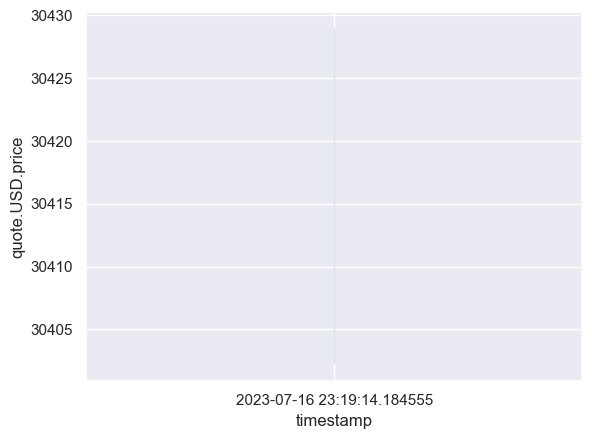

In [200]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df_bit)

In [166]:
type(df_s)

pandas.core.series.Series

In [183]:
df_frame = df_s.to_frame(name='values')
df_frame

values
name                                                 
Bitcoin      quote.USD.percent_change_1h     0.247136
             quote.USD.percent_change_24h    0.363295
             quote.USD.percent_change_7d     0.363967
             quote.USD.percent_change_30d   18.924968
             quote.USD.percent_change_60d   13.525561
             quote.USD.percent_change_90d    3.327315
Ethereum     quote.USD.percent_change_1h     0.398913
             quote.USD.percent_change_24h    0.288244
             quote.USD.percent_change_7d     4.028038
             quote.USD.percent_change_30d   16.374282
             quote.USD.percent_change_60d    7.929418
             quote.USD.percent_change_90d   -6.540498
Tether       quote.USD.percent_change_1h    -0.010911
             quote.USD.percent_change_24h    0.008233
             quote.USD.percent_change_7d     0.014931
             quote.USD.percent_change_30d    0.162256
             quote.USD.percent_change_60d    0.029782
             quote.USD.percent_change_90d    0.002911
XRP          quote.USD.percent_change_1h     2.165837
             quote.USD.percent_change_24h    6.558095
             quote.USD.percent_change_7d    63.870205
             quote.USD.percent_change_30d   65.946156
             quote.USD.percent_change_60d   74.897875
             quote.USD.percent_change_90d   50.244541
BNB          quote.USD.percent_change_1h     0.209649
             quote.USD.percent_change_24h   -0.433489
             quote.USD.percent_change_7d     6.262935
             quote.USD.percent_change_30d    5.326285
             quote.USD.percent_change_60d  -19.285356
             quote.USD.percent_change_90d  -26.753745
USD Coin     quote.USD.percent_change_1h    -0.012642
             quote.USD.percent_change_24h    0.001529
             quote.USD.percent_change_7d    -0.013876
             quote.USD.percent_change_30d   -0.015830
             quote.USD.percent_change_60d    0.001550
             quote.USD.percent_change_90d    0.026193
Solana       quote.USD.percent_change_1h    -0.525719
             quote.USD.percent_change_24h    1.194713
             quote.USD.percent_change_7d    31.697046
             quote.USD.percent_change_30d   91.459608
             quote.USD.percent_change_60d   37.343566
             quote.USD.percent_change_90d   13.621968
Cardano      quote.USD.percent_change_1h     0.487335
             quote.USD.percent_change_24h   -2.519004
             quote.USD.percent_change_7d    12.313297
             quote.USD.percent_change_30d   25.288841
             quote.USD.percent_change_60d  -12.268006
             quote.USD.percent_change_90d  -26.078675
Dogecoin     quote.USD.percent_change_1h     0.517945
             quote.USD.percent_change_24h   -1.237047
             quote.USD.percent_change_7d     8.709877
             quote.USD.percent_change_30d   16.179941
             quote.USD.percent_change_60d   -3.123799
             quote.USD.percent_change_90d  -22.014243
Polygon      quote.USD.percent_change_1h     0.350923
             quote.USD.percent_change_24h   -2.286762
             quote.USD.percent_change_7d    14.486824
             quote.USD.percent_change_30d   38.302295
             quote.USD.percent_change_60d   -7.394867
             quote.USD.percent_change_90d  -32.275178
TRON         quote.USD.percent_change_1h     0.252608
             quote.USD.percent_change_24h   -0.736854
             quote.USD.percent_change_7d     1.928130
             quote.USD.percent_change_30d   15.527689
             quote.USD.percent_change_60d   13.865288
             quote.USD.percent_change_90d   21.998170
Litecoin     quote.USD.percent_change_1h     0.431231
             quote.USD.percent_change_24h    0.521639
             quote.USD.percent_change_7d    -1.711616
             quote.USD.percent_change_30d   26.488115
             quote.USD.percent_change_60d    3.107735
             quote.USD.percent_change_90d   -4.309268
Polkadot     quote.USD.percent_change_1h     0.3435

In [184]:
df_frame.count()

values    90
dtype: int64

In [185]:

index = pd.Index(range(90))

df_id = df_frame.reset_index()
df_id

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.247136
1,Bitcoin,quote.USD.percent_change_24h,0.363295
2,Bitcoin,quote.USD.percent_change_7d,0.363967
3,Bitcoin,quote.USD.percent_change_30d,18.924968
4,Bitcoin,quote.USD.percent_change_60d,13.525561
5,Bitcoin,quote.USD.percent_change_90d,3.327315
6,Ethereum,quote.USD.percent_change_1h,0.398913
7,Ethereum,quote.USD.percent_change_24h,0.288244
8,Ethereum,quote.USD.percent_change_7d,4.028038
9,Ethereum,quote.USD.percent_change_30d,16.374282


In [186]:
df_id = df_id.rename(columns={'level_1': 'percent_change'})
df_id

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.247136
1,Bitcoin,quote.USD.percent_change_24h,0.363295
2,Bitcoin,quote.USD.percent_change_7d,0.363967
3,Bitcoin,quote.USD.percent_change_30d,18.924968
4,Bitcoin,quote.USD.percent_change_60d,13.525561
5,Bitcoin,quote.USD.percent_change_90d,3.327315
6,Ethereum,quote.USD.percent_change_1h,0.398913
7,Ethereum,quote.USD.percent_change_24h,0.288244
8,Ethereum,quote.USD.percent_change_7d,4.028038
9,Ethereum,quote.USD.percent_change_30d,16.374282


In [187]:
df_id['percent_change'] = df_id['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df_id

,name,percent_change,values
0,Bitcoin,1h,0.247136
1,Bitcoin,24h,0.363295
2,Bitcoin,7d,0.363967
3,Bitcoin,30d,18.924968
4,Bitcoin,60d,13.525561
5,Bitcoin,90d,3.327315
6,Ethereum,1h,0.398913
7,Ethereum,24h,0.288244
8,Ethereum,7d,4.028038
9,Ethereum,30d,16.374282


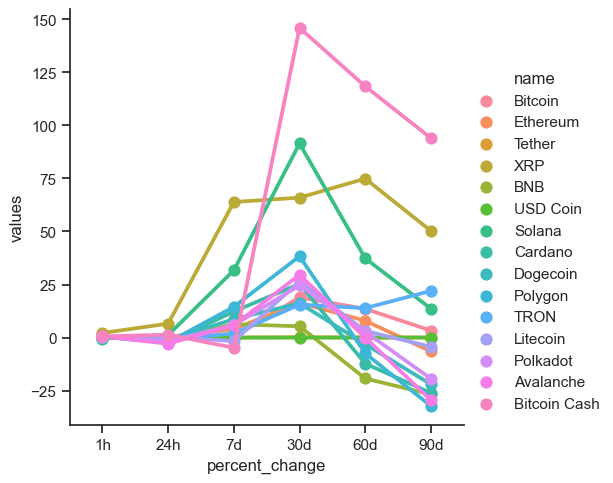

In [194]:
sns.catplot(x='percent_change', y='values', hue='name', data=df_id, kind='point')